In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
#from xgboost import XGBRegressor
import warnings

In [2]:
data = pd.read_csv('C:\\Users\\User\\Desktop\\Frontend\\DS\\mlprojects\\notebook\\data\\StudentsPerformance.csv') 

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Use all the columns to predict the math score of a student

In [4]:
X = data.drop(columns=['math score'],axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
y = data['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

We create a pipeline:
- Categorical features to numerical (since number of categories in each of our categorical variable is small we use One hot encoding, otherwise use target guided ordinal encoding)
- Then use standardization and normalization on these numerical features

In [6]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#initialize the standard scalar and one hot encoder
numeric_transformer = StandardScaler() 
oh_transformer = OneHotEncoder()

#this creates the pipeline that transform the columns
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features), #one hot encoding of the categorical 
         ("StandardScaler", numeric_transformer, num_features), #standardisation of numerical features
    ]
)

In [7]:
#fit transform the X dataset
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [8]:
X.shape

(1000, 19)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

#### Create a function to evaluate the model trained on all metrics

In [13]:
def evaluate_function(true,pred):
    mae = mean_absolute_error(true,pred)
    mse = mean_squared_error(true,pred)
    rmse = np.sqrt(mse)
    r2_squared = r2_score(true,pred)
    return mae,rmse,r2_squared

In [21]:
models={
    "Linear": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Ada Boost": AdaBoostRegressor()
}

In [22]:
model_list = []
r2_list = []
mae_list = []
rmse_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_function(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_function(y_test,y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print("Model performance for training set:")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2: {:.4f}".format(model_train_r2))

    print("-----------------------------------------")

    print("Model performance for test set:")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    rmse_list.append(model_test_rmse)
    mae_list.append(model_test_mae)

    print("=========================================")
    print("\n")

Linear
Model performance for training set:
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2: 0.8743
-----------------------------------------
Model performance for test set:
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2: 0.8804


Lasso
Model performance for training set:
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2: 0.8071
-----------------------------------------
Model performance for test set:
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2: 0.8253


Ridge
Model performance for training set:
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2: 0.8743
-----------------------------------------
Model performance for test set:
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2: 0.8806


K-Neighbors
Model performance for training set:
- Root Mean Squared Error: 5.6989
- Mean Absolute Error: 4.5038
- R2: 0.8559
-----------------------------------------
Model performanc

In [23]:
results = pd.DataFrame(list(zip(model_list, r2_list, rmse_list, mae_list)), columns=['Model Name', 'R2_Score', 'Root Mean Squared Error', 'Mean Absolute Error'])

Text(0.5, 1.0, 'R2 for all models')

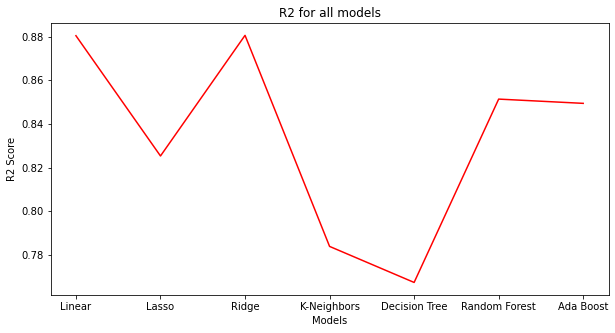

In [34]:
plt.figure(figsize=(10,5))
plt.plot(results['Model Name'],results['R2_Score'],color='red',label='R2 Score')
plt.ylabel("R2 Score")
plt.xlabel("Models")
plt.title("R2 for all models")

Text(0.5, 1.0, 'RMSE and MAE for all models')

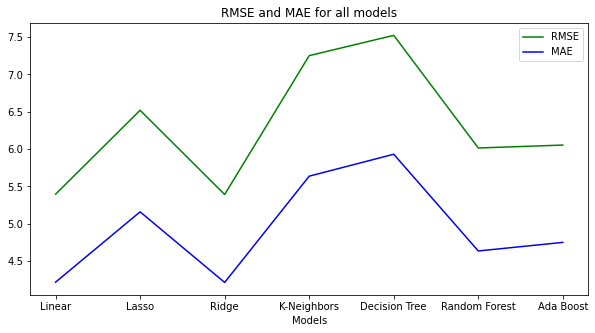

In [35]:
plt.figure(figsize=(10,5))
plt.plot(results['Model Name'],results['Root Mean Squared Error'],color='green',label='RMSE')
plt.plot(results['Model Name'],results['Mean Absolute Error'],color='blue',label='MAE')
plt.xlabel("Models")
plt.legend()
plt.title("RMSE and MAE for all models")

#### We choose linear regression

In [36]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


Text(0.5, 1.0, 'True vs Predicted math score (Test data) after Linear Regression')

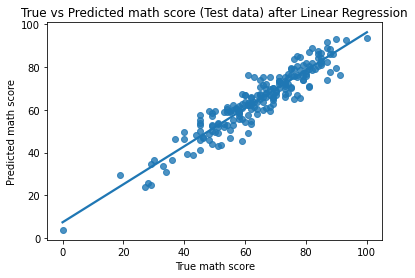

In [41]:
sns.regplot(x=y_test,y=y_pred,ci=None)
plt.xlabel('True math score')
plt.ylabel('Predicted math score')
plt.title("True vs Predicted math score (Test data) after Linear Regression")